In [13]:
import sys, os
import numpy as np
sys.path.append(os.path.abspath('../../smodels'))
from smodels.tools.simplifiedLikelihoods import UpperLimitComputer, Data, LikelihoodComputer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats,integrate,optimize,special
from tqdm.notebook import tqdm

In [14]:
def getSRs():
    from smodels.experiment.databaseObj import Database
    db = Database ( "official" )
    ers = db.getExpResults( dataTypes=[ "efficiencyMap" ] )
    stats_ = []
    for er in ers:
        for ds in er.datasets:
            D = { "obsN": ds.dataInfo.observedN, "expectedBG": ds.dataInfo.expectedBG,
                  "bgError": ds.dataInfo.bgError, "upperLimit": ds.dataInfo.upperLimit,
                  "expectedUpperLimit": ds.dataInfo.expectedUpperLimit }
            stats_.append ( D )
    return stats_

In [6]:
stats_ = getSRs()

In [19]:
def llhd_smodels (mu, nobs, nExp, nExpErr):
    data = Data ( nobs, nExp, nExpErr**2, nsignal = 1)
    llhd_computer = LikelihoodComputer(data)
    return llhd_computer.marginalizedLLHD1D(mu, nll=False)

In [69]:
norm = []
for i in tqdm(stats_):
    nobs = i["obsN"]
    nExp = i["expectedBG"]
    nExpErr = i["bgError"]
    mumax = (nobs+nExp+nExpErr)*5
    while llhd_smodels(mumax, nobs, nExp, nExpErr)> 1.0e-5:
        mumax= 10*mumax
    try:
        norm_ = integrate.quad(llhd_smodels, 0, mumax, args=(nobs, nExp, nExpErr))
    except:
        continue
    norm.append(norm_[0])

  0%|          | 0/271 [00:00<?, ?it/s]

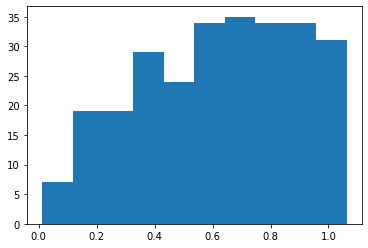

In [70]:
plt.hist(norm, bins=10)
plt.show()

In [66]:
### Schaue, ob die Likelihood bei mumax schon klein ist
value_at_mumax = []
for i in tqdm(stats_):
    nobs = i["obsN"]
    nExp = i["expectedBG"]
    nExpErr = i["bgError"]
    mumax = (nobs+nExp+nExpErr)*5
    while llhd_smodels(mumax, nobs, nExp, nExpErr) > 1.0e-5:
        mumax= 10*mumax
    try:
        val_mumax = llhd_smodels (mumax, nobs, nExp, nExpErr)
    except:
        continue
    value_at_mumax.append(val_mumax)

  0%|          | 0/271 [00:00<?, ?it/s]

In [67]:
value_at_mumax

[9.230933434251483e-07,
 7.183242936709855e-08,
 8.855890967208822e-08,
 2.277085913647563e-09,
 3.913526414637872e-09,
 4.8919185141113544e-08,
 1.2020098977749275e-06,
 2.905462744349675e-08,
 1.1038460110003568e-07,
 4.959943539516069e-07,
 6.607230752023936e-08,
 1.8591731475505357e-09,
 2.9452557512791737e-09,
 5.794674358700926e-09,
 7.301021233253343e-09,
 1.322372457588562e-08,
 6.730309200276896e-08,
 1.4283815457936595e-06,
 2.2636207696050535e-09,
 7.841808254942281e-09,
 4.8556483161725524e-09,
 2.0252978113963124e-08,
 1.1002105878538539e-07,
 2.1458024408985732e-07,
 3.675188864161191e-08,
 6.524740545538798e-09,
 2.4090454712983315e-08,
 1.0130065363666105e-08,
 1.5153654026573778e-07,
 2.7441732522993378e-09,
 7.563030967362806e-07,
 1.5127548977741967e-06,
 3.7364357382760025e-06,
 1.0569316181084457e-08,
 1.7057794801471247e-08,
 5.676142532235077e-08,
 3.488198354212284e-08,
 6.9977999695326525e-09,
 1.6378620635360261e-06,
 3.945418724224626e-08,
 7.3220312875988365

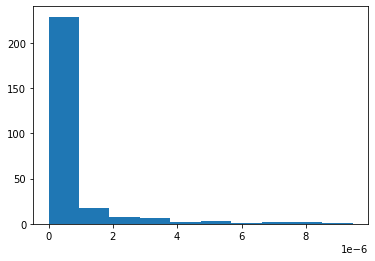

In [68]:
plt.hist(value_at_mumax)
plt.show()